In [43]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [45]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [ ]:
relevant_cols = ['Had you had sexual intercourse before starting university?', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)']

drugs_virgin_before_uni = class_df[relevant_cols]
drugs_virgin_before_uni.head()

In [ ]:
drugs_virgin_before_uni.loc[drugs_virgin_before_uni['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] != 'I did not use drugs', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] = 'I used drugs'

drugs_virgin_before_uni.head(10)

In [ ]:
drugs_virgin_before_uni = drugs_virgin_before_uni.dropna()
drugs_virgin_before_uni.head(10)

In [ ]:
drugs_virgin_before_uni = drugs_virgin_before_uni[drugs_virgin_before_uni['Had you had sexual intercourse before starting university?'] == 'No']
drugs_virgin_before_uni

In [ ]:
drugs_virgin_before_uni['Number of people'] = drugs_virgin_before_uni.groupby(['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'])['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'].transform('count')
drugs_virgin_before_uni.head(10)

In [ ]:
drugs_virgin_before_uni = drugs_virgin_before_uni.drop_duplicates(subset=['Had you had sexual intercourse before starting university?', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)', 'Number of people'], keep='first')
drugs_virgin_before_uni

In [ ]:
drugs_not_virgin_before_uni=class_df[relevant_cols]
drugs_not_virgin_before_uni.head()

In [ ]:
drugs_not_virgin_before_uni.loc[drugs_not_virgin_before_uni['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] != 'I did not use drugs', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'] = 'I used drugs'

In [54]:
drugs_not_virgin_before_uni = drugs_not_virgin_before_uni.dropna()

In [ ]:
drugs_not_virgin_before_uni = drugs_not_virgin_before_uni[drugs_not_virgin_before_uni['Had you had sexual intercourse before starting university?'] == 'Yes']
drugs_not_virgin_before_uni.head()

In [56]:
drugs_not_virgin_before_uni['Number of people'] = drugs_not_virgin_before_uni.groupby(['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'])['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)'].transform('count')

In [57]:
drugs_not_virgin_before_uni = drugs_not_virgin_before_uni.drop_duplicates(subset=['If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)', 'If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)', 'Number of people'], keep='first')

In [ ]:
drugs_not_virgin_before_uni

In [ ]:
frames=[drugs_virgin_before_uni, drugs_not_virgin_before_uni]
drugsSex=pd.concat(frames)
drugsSex

In [ ]:
total_respondants = drugsSex['Number of people'].sum()
total_respondants
drugsSex['Percentage of People'] = (drugsSex['Number of people'] / total_respondants) * 100
drugsSex

In [ ]:
drugsSex.rename(columns={"If you have used recreational drugs, which ones? (If you have not used drugs, indicate as such)": "Drug Consumption"}, inplace=True)
drugsSex

Text(14.176543402777774, 0.5, 'Percentage of people (%)')

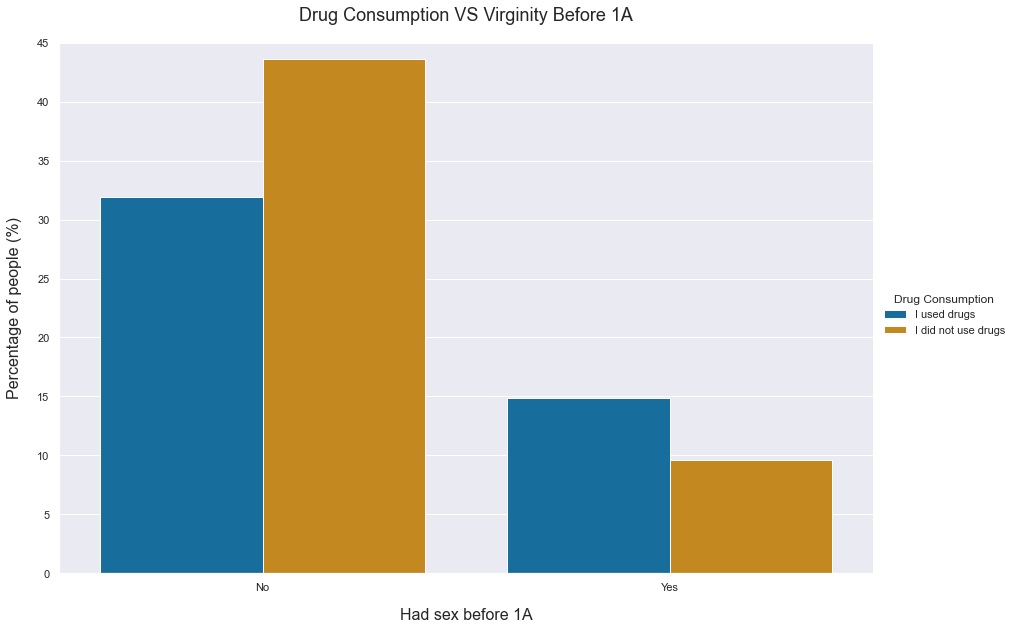

In [62]:
sns.set(font_scale=1.2)
sns.set_theme(palette="colorblind")
ax=sns.catplot(x='Had you had sexual intercourse before starting university?', y='Percentage of People', hue='Drug Consumption', data=drugsSex, kind='bar', height=8, aspect=1.5)
ax.set(ylim=(0, 45))
plt.title("Drug Consumption VS Virginity Before 1A", fontsize=18, y=1.03)
plt.xlabel("Had sex before 1A", labelpad=15, fontsize=16)
plt.ylabel("Percentage of people (%)", labelpad=15, fontsize=16)